In [1]:
tweet1=pd.read_csv("https://raw.githubusercontent.com/prateekjoshi565/twitter_sentiment_analysis/master/train_E6oV3lV.csv")

NameError: name 'pd' is not defined

In [ ]:
tweet1.to_csv("tweets_data.csv")

Data from https://www.kaggle.com/kazanova/sentiment140

In [2]:
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
stopwords = set((stopwords.words('english')))
import pandas as pd
import re

In [2]:
tweets = pd.read_csv("tweets_data.csv", usecols=['label','tweet'])

In [3]:
tweets.head(20)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
tweets.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [6]:
tweets.shape

(31962, 2)

# Splitting into train and test

In [27]:
from sklearn.model_selection import train_test_split
tweets_train, tweets_test, target_train, target_test = train_test_split(tweets.tweet,tweets.label,test_size = 0.2)

In [8]:
tweets_train.shape

(25569,)

In [30]:
tweets_train.columns

AttributeError: 'Series' object has no attribute 'columns'

In [31]:
tweets_train

2366     well and truly spoilt today! can't wait to try...
22936    best #essentialoils for #anxiety !!     #healt...
14556    #nature_perfection   bull hill climb: you have...
405      @user when you're blocked by a  troll because ...
20770    @user please retire nina turner.  she adds not...
                               ...                        
7677     profoundly   and #disturbing for the victims a...
23846             @user mid-week @user @user with @user   
31207    happy father's day to all you wonderful #dads!...
796      i love #abrahamhicks and #lawofattraction !!  ...
1490     i laugh too much, it's problematic... it affec...
Name: tweet, Length: 25569, dtype: object

In [9]:
tweets_test.shape

(6393,)

# Text Preprocessing

# Cleaning

In [32]:
def to_lower(word):
    result = word.lower()
    return result

def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def remove_mentions(word):
    return re.sub(r"@\S+", "", word)

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = re.sub('[^A-Za-z]+', ' ', word)
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')

def remove_stopwords(word):
    return ' '.join(word for word in i.split() if word not in stopwords)



def clean_up_pipeline(sentence):
    cleaning_data = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace]
    for func in cleaning_data:
        
        sentence = func(sentence)
    return sentence

print(tweets_train)
tweets_train = tweets_train.apply(clean_up_pipeline)
#tweets_train['text']
#tweets_train = [clean_up_pipeline(each_tweet) for each_tweet in tweets_train.]
#cleaned_tweets_test = [clean_up_pipeline(o) for o in tweets_test]

print(tweets_train)

#cleaned_tweets_train[2]

2366     well and truly spoilt today! can't wait to try...
22936    best #essentialoils for #anxiety !!     #healt...
14556    #nature_perfection   bull hill climb: you have...
405      @user when you're blocked by a  troll because ...
20770    @user please retire nina turner.  she adds not...
                               ...                        
7677     profoundly   and #disturbing for the victims a...
23846             @user mid-week @user @user with @user   
31207    happy father's day to all you wonderful #dads!...
796      i love #abrahamhicks and #lawofattraction !!  ...
1490     i laugh too much, it's problematic... it affec...
Name: tweet, Length: 25569, dtype: object
2366     well and truly spoilt today can t wait to try ...
22936    best essentialoils for anxiety healthy peace a...
14556    nature perfection bull hill climb you have to ...
405      user when you re blocked by a troll because yo...
20770    user please retire nina turner she adds nothin...
              

# Tokenization

In [39]:
from nltk.tokenize import word_tokenize
tweets_train = tweets_train.apply(word_tokenize)
#cleaned_tweets_test = cleaned_tweets_test.apply(word_tokenize)

In [40]:
tweets_train

2366     [well, and, truly, spoilt, today, can, t, wait...
22936    [best, essentialoils, for, anxiety, healthy, p...
14556    [nature, perfection, bull, hill, climb, you, h...
405      [user, when, you, re, blocked, by, a, troll, b...
20770    [user, please, retire, nina, turner, she, add,...
                               ...                        
7677     [profoundly, and, disturbing, for, the, victim...
23846            [user, mid, week, user, user, with, user]
31207    [happy, father, s, day, to, all, you, wonderfu...
796      [i, love, abrahamhicks, and, lawofattraction, ...
1490     [i, laugh, too, much, it, s, problematic, it, ...
Name: tweet, Length: 25569, dtype: object

# Stemming

In [42]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text])
tweets_train = tweets_train.apply(lambda text: stem_words(text))

In [43]:
tweets_train

2366     well and truli spoilt today can t wait to tri ...
22936    best essentialoil for anxieti healthi peac alt...
14556    natur perfect bull hill climb you have to reac...
405      user when you re block by a troll becaus you p...
20770    user pleas retir nina turner she add noth at t...
                               ...                        
7677     profoundli and disturb for the victim and thei...
23846                    user mid week user user with user
31207    happi father s day to all you wonder dad kango...
796      i love abrahamhick and lawofattract healthi he...
1490     i laugh too much it s problemat it affect perc...
Name: tweet, Length: 25569, dtype: object

# Word Embedding

# Word2Vec

In [45]:
import gensim
tokenize=tweets_train.apply(lambda x: x.split())
w2vec_model=gensim.models.Word2Vec(tokenize,min_count = 1, size = 100, window = 5, sg = 1)
w2vec_model.train(tokenize,total_examples= len(tweets_train),epochs=20)


(5313859, 6639100)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
bow=CountVectorizer( min_df=2, max_features=1000)
bow.fit(tweets_train)
bow_df=bow.transform(tweets_train).toarray()

In [61]:
bow_df.shape

(25569, 1000)

# Model

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
import numpy as np
from sklearn.svm import SVC


In [54]:
target_train =np.array(target_train)

In [64]:
lreg = LogisticRegression()
lreg.fit(bow_df, np.array(target_train)) # training the model

prediction = lreg.predict_proba(bow_df) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(target_train, prediction_int) 

C:\Users\Kavya Vidiyala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6617733411626541

In [65]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

cf_matrix =confusion_matrix(target_train,prediction_int)

tn, fp, fn, tp = confusion_matrix(target_train,prediction_int).ravel()

print("Precision: {:.2f}%".format(100 * precision_score(target_train, prediction_int)))
print("Recall: {:.2f}%".format(100 * recall_score(target_train, prediction_int)))
print("F1 Score: {:.2f}%".format(100 * f1_score(target_train,prediction_int)))

Precision: 70.97%
Recall: 61.99%
F1 Score: 66.18%


In [76]:
model_list = [LogisticRegression(), linear_model.RidgeClassifier(),GaussianNB(), SVC(kernel = 'linear')]

In [79]:
for model in model_list:
    model.fit(bow_df, np.array(target_train))
    prediction = model.predict_proba(bow_df) # predicting on the validation set
    prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
    prediction_int = prediction_int.astype(np.int)

    f1score=f1_score(target_train, prediction_int) 
    print(f1score)
              

C:\Users\Kavya Vidiyala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6617733411626541


AttributeError: 'RidgeClassifier' object has no attribute 'predict_proba'

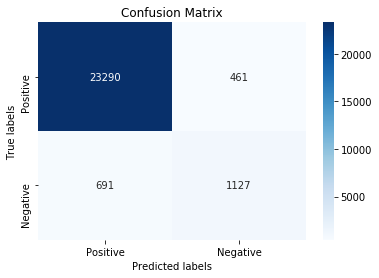

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

# Lower

In [5]:
tweets.tweet = tweets.tweet.str.lower()

In [6]:
tweets

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# Remove URL

In [7]:
l= []

for i in tweets.tweet:
    l.append(re.sub(r"http\S+", "", i))
tweets.tweet = l

In [8]:
tweets

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# remove @ mentions

In [9]:
l = []
for i in tweets.tweet:
    l.append(re.sub(r"@\S+", "", i))
tweets.tweet = l

In [10]:
tweets

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate isz that youuu?ððððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"#sikh #temple vandalised in in #calgary, #wso..."


# Removing all special characters

In [11]:
l=[]
for sentence in tweets.tweet:
    l.append(re.sub('[^A-Za-z]+', ' ', sentence))
tweets.tweet = l

In [12]:
tweets

,label,tweet
0,0,when a father is dysfunctional and is so self...
1,0,thanks for lyft credit i can t use cause they...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur
4,0,factsguide society now motivation
...,...,...
31957,0,ate isz that youuu
31958,0,to see nina turner on the airwaves trying to ...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary wso cond...


# Remove stop words

In [13]:
no_stopwords=[]
for i in tweets.tweet:
    no_stopwords.append(' '.join(word for word in i.split() if word not in stopwords))
tweets.tweet = no_stopwords

In [14]:
tweets

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


# TFIDF Vectorizer

In [17]:

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = feature_extraction.text.TfidfVectorizer(norm = None)
vectorizer.fit(tweets)
X_train_tfidf = vectorizer.fit_transform(tweets)
#X_test_tfidf = train['sentiment']
#Y_train_tdidf =vectorizer.transform(test['review'])

In [22]:
X_train_tfidf.shape


(2, 2)